# Install Package

In [37]:
!pip install roboflow --quiet
!pip install ultralytics opencv-python matplotlib supervision --quiet

# restart
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.7 MB/s eta 0:00:00


{'status': 'ok', 'restart': True}

# GET KEY
what is the format for KEY.txt<br>
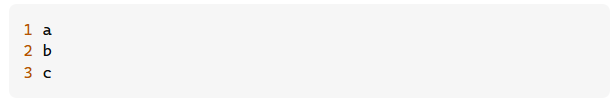

In [1]:
# create connection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# read the key value for Dataset and GitHub
%cd /content/drive/MyDrive

# hold the key with dict
keys = {}

with open("KEY.txt") as f :
  # open success
  for line in f :
    if not line or line.isspace() :
      # when empty
      break;

    (key, val) = line.split()
    keys[key] = val # store the value
    print(f"{key} store success!")

# switch back
%cd /content/

/content/drive/MyDrive
RobotFlow store success!
GitHub store success!
/content


# Store dataset to GitHub

In [3]:
from roboflow import Roboflow # import get dataset

rf = Roboflow(api_key=keys["RobotFlow"])
project = rf.workspace("crabbbb").project("human-in-bus-stop")
version = project.version(6) # version with only have leg
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-in-Bus-Stop-6 in yolov11:: 100%|██████████| 700/700 [00:00<00:00, 6047.05it/s]


In [4]:
print(dataset.location)

/content/Human-in-Bus-Stop-6


In [5]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['leg']

roboflow:
  workspace: crabbbb
  project: human-in-bus-stop
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/crabbbb/human-in-bus-stop/dataset/6

In [6]:
# connect to github
!git clone https://{keys["GitHub"]}@github.com/crabbbb/Crowd-Detection.git

Cloning into 'Crowd-Detection'...
remote: Enumerating objects: 578, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 578 (delta 2), reused 6 (delta 1), pack-reused 571 (from 1)
Receiving objects: 100% (578/578), 186.90 MiB | 31.70 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [8]:
# copy the dataset to github
!cp -r {dataset.location} /content/Crowd-Detection/FineTune/dataset

In [9]:
# change to repository
%cd /content/Crowd-Detection

# push the dataset to github
!git config --global user.name "crabbbb"

!git config --global user.email "xuezhanixi666@gmail.com"

# stage and commit the change
!git add .
!git commit -m "added dataset"

# push
!git push https://{keys["GitHub"]}@github.com/crabbbb/Crowd-Detection.git

# change back to home
%cd /content/

/content/Crowd-Detection
[main 3421e86] added dataset
 691 files changed, 2783 insertions(+)
 create mode 100644 FineTune/dataset/README.dataset.txt
 create mode 100644 FineTune/dataset/README.roboflow.txt
 create mode 100644 FineTune/dataset/data.yaml
 create mode 100644 FineTune/dataset/test/images/BS_frame13_jpg.rf.2b52b1775d911d221e8e6070c9c1ac7e.jpg
 create mode 100644 FineTune/dataset/test/images/frame_0_jpg.rf.25e9dd0a7ddda43956fa393b3bd99ae9.jpg
 create mode 100644 FineTune/dataset/test/images/frame_1092_jpg.rf.7045bff1af661f99d59b9674d0983717.jpg
 create mode 100644 FineTune/dataset/test/images/frame_1272_jpg.rf.357f9189b0032177771993c6c2cd29fe.jpg
 create mode 100644 FineTune/dataset/test/images/frame_1902_jpg.rf.ffa3fc78a4ccbdce54051be2d73eba3f.jpg
 create mode 100644 FineTune/dataset/test/images/frame_2067_jpg.rf.a7c612653c3f3ba94efb213e68a134be.jpg
 create mode 100644 FineTune/dataset/test/images/frame_2502_jpg.rf.c728d011e1daa7dc15068ad6928329e2.jpg
 create mode 100644 Fi

# Testing Model Ori Ability
NOTE : dataset should be put under content

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

modelName = "yolo11l.pt"
imagePath = f"{dataset.location}/train/images/BS_frame104_jpg.rf.2e32bd75bf555d4044e089fb2e521984.jpg"

# download model
model = YOLO(modelName)


image 1/1 /content/Human-in-Bus-Stop-6/train/images/BS_frame104_jpg.rf.2e32bd75bf555d4044e089fb2e521984.jpg: 384x640 4 persons, 207.3ms
Speed: 7.4ms preprocess, 207.3ms inference, 1138.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


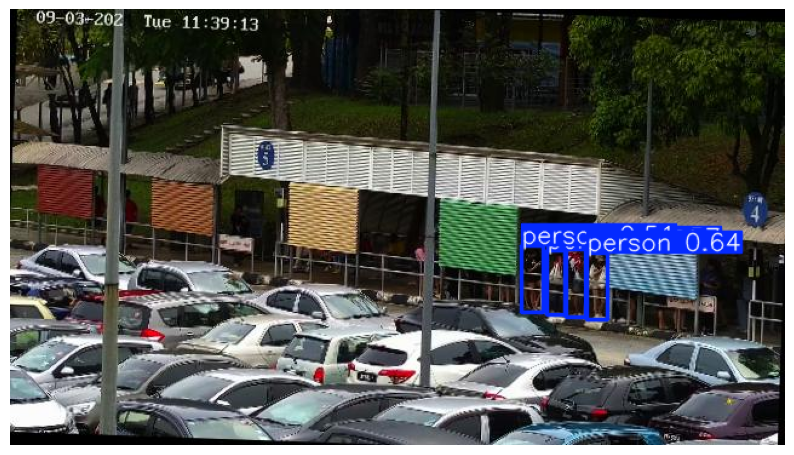

In [13]:
# test and get result
result = model(imagePath, save=True, imgsz=640, conf=0.25, classes=[0])

# draw bounding box
annotatedImage = result[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [14]:
# info get from predict

# bounding box coordinates [x1, y1, x2, y2]
boxes = result[0].boxes.xyxy

display(boxes)

# confidence scores
scores = result[0].boxes.conf

display(scores)

# class labels
labels = result[0].boxes.cls

display(labels)

tensor([[476.1158, 201.1512, 493.6369, 256.3837],
        [422.1198, 195.2887, 440.6907, 250.4914],
        [443.3946, 199.9982, 458.6216, 252.3306],
        [459.5853, 197.1356, 475.0403, 254.3860]], device='cuda:0')

tensor([0.6406, 0.5107, 0.3920, 0.3724], device='cuda:0')

tensor([0., 0., 0., 0.], device='cuda:0')

In [15]:
height, width = annotatedImage.shape[:2]
display(height, width)

360

640

In [16]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

# Fine Tune YOLO11x.pt model with Custom Dataset
- due to the testing on trying to keep the original ability on detecting person and bus unsuccess, so at here will only train the model to able detect leg ( leg detector )
- epochs = 25 means the machine required to run the complete dataset 25 times and get the best and last training result in this 25 times as return

In [17]:
!yolo task=detect mode=train model=yolo11l.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Human-in-Bus-Stop-6/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

# Display the training result

In [2]:
resultPath = "/content/runs/detect/train"

# based on the train result get the best model
legDetectorBest = YOLO(f"{resultPath}/weights/best.pt")
legDetectorLast = YOLO(f"{resultPath}/weights/last.pt")

print(f"Best > {legDetectorBest.names}")
print(f"Last > {legDetectorLast.names}")

Best > {0: 'leg'}
Last > {0: 'leg'}


In [19]:
%ls {resultPath}

args.yaml                                           P_curve.png       train_batch285.jpg
confusion_matrix_normalized.png                     PR_curve.png      train_batch286.jpg
confusion_matrix.png                                R_curve.png       train_batch287.jpg
events.out.tfevents.1732432445.04290903b1e9.2978.0  results.csv       train_batch2.jpg
F1_curve.png                                        results.png       val_batch0_labels.jpg
labels_correlogram.jpg                              train_batch0.jpg  val_batch0_pred.jpg
labels.jpg                                          train_batch1.jpg  weights/


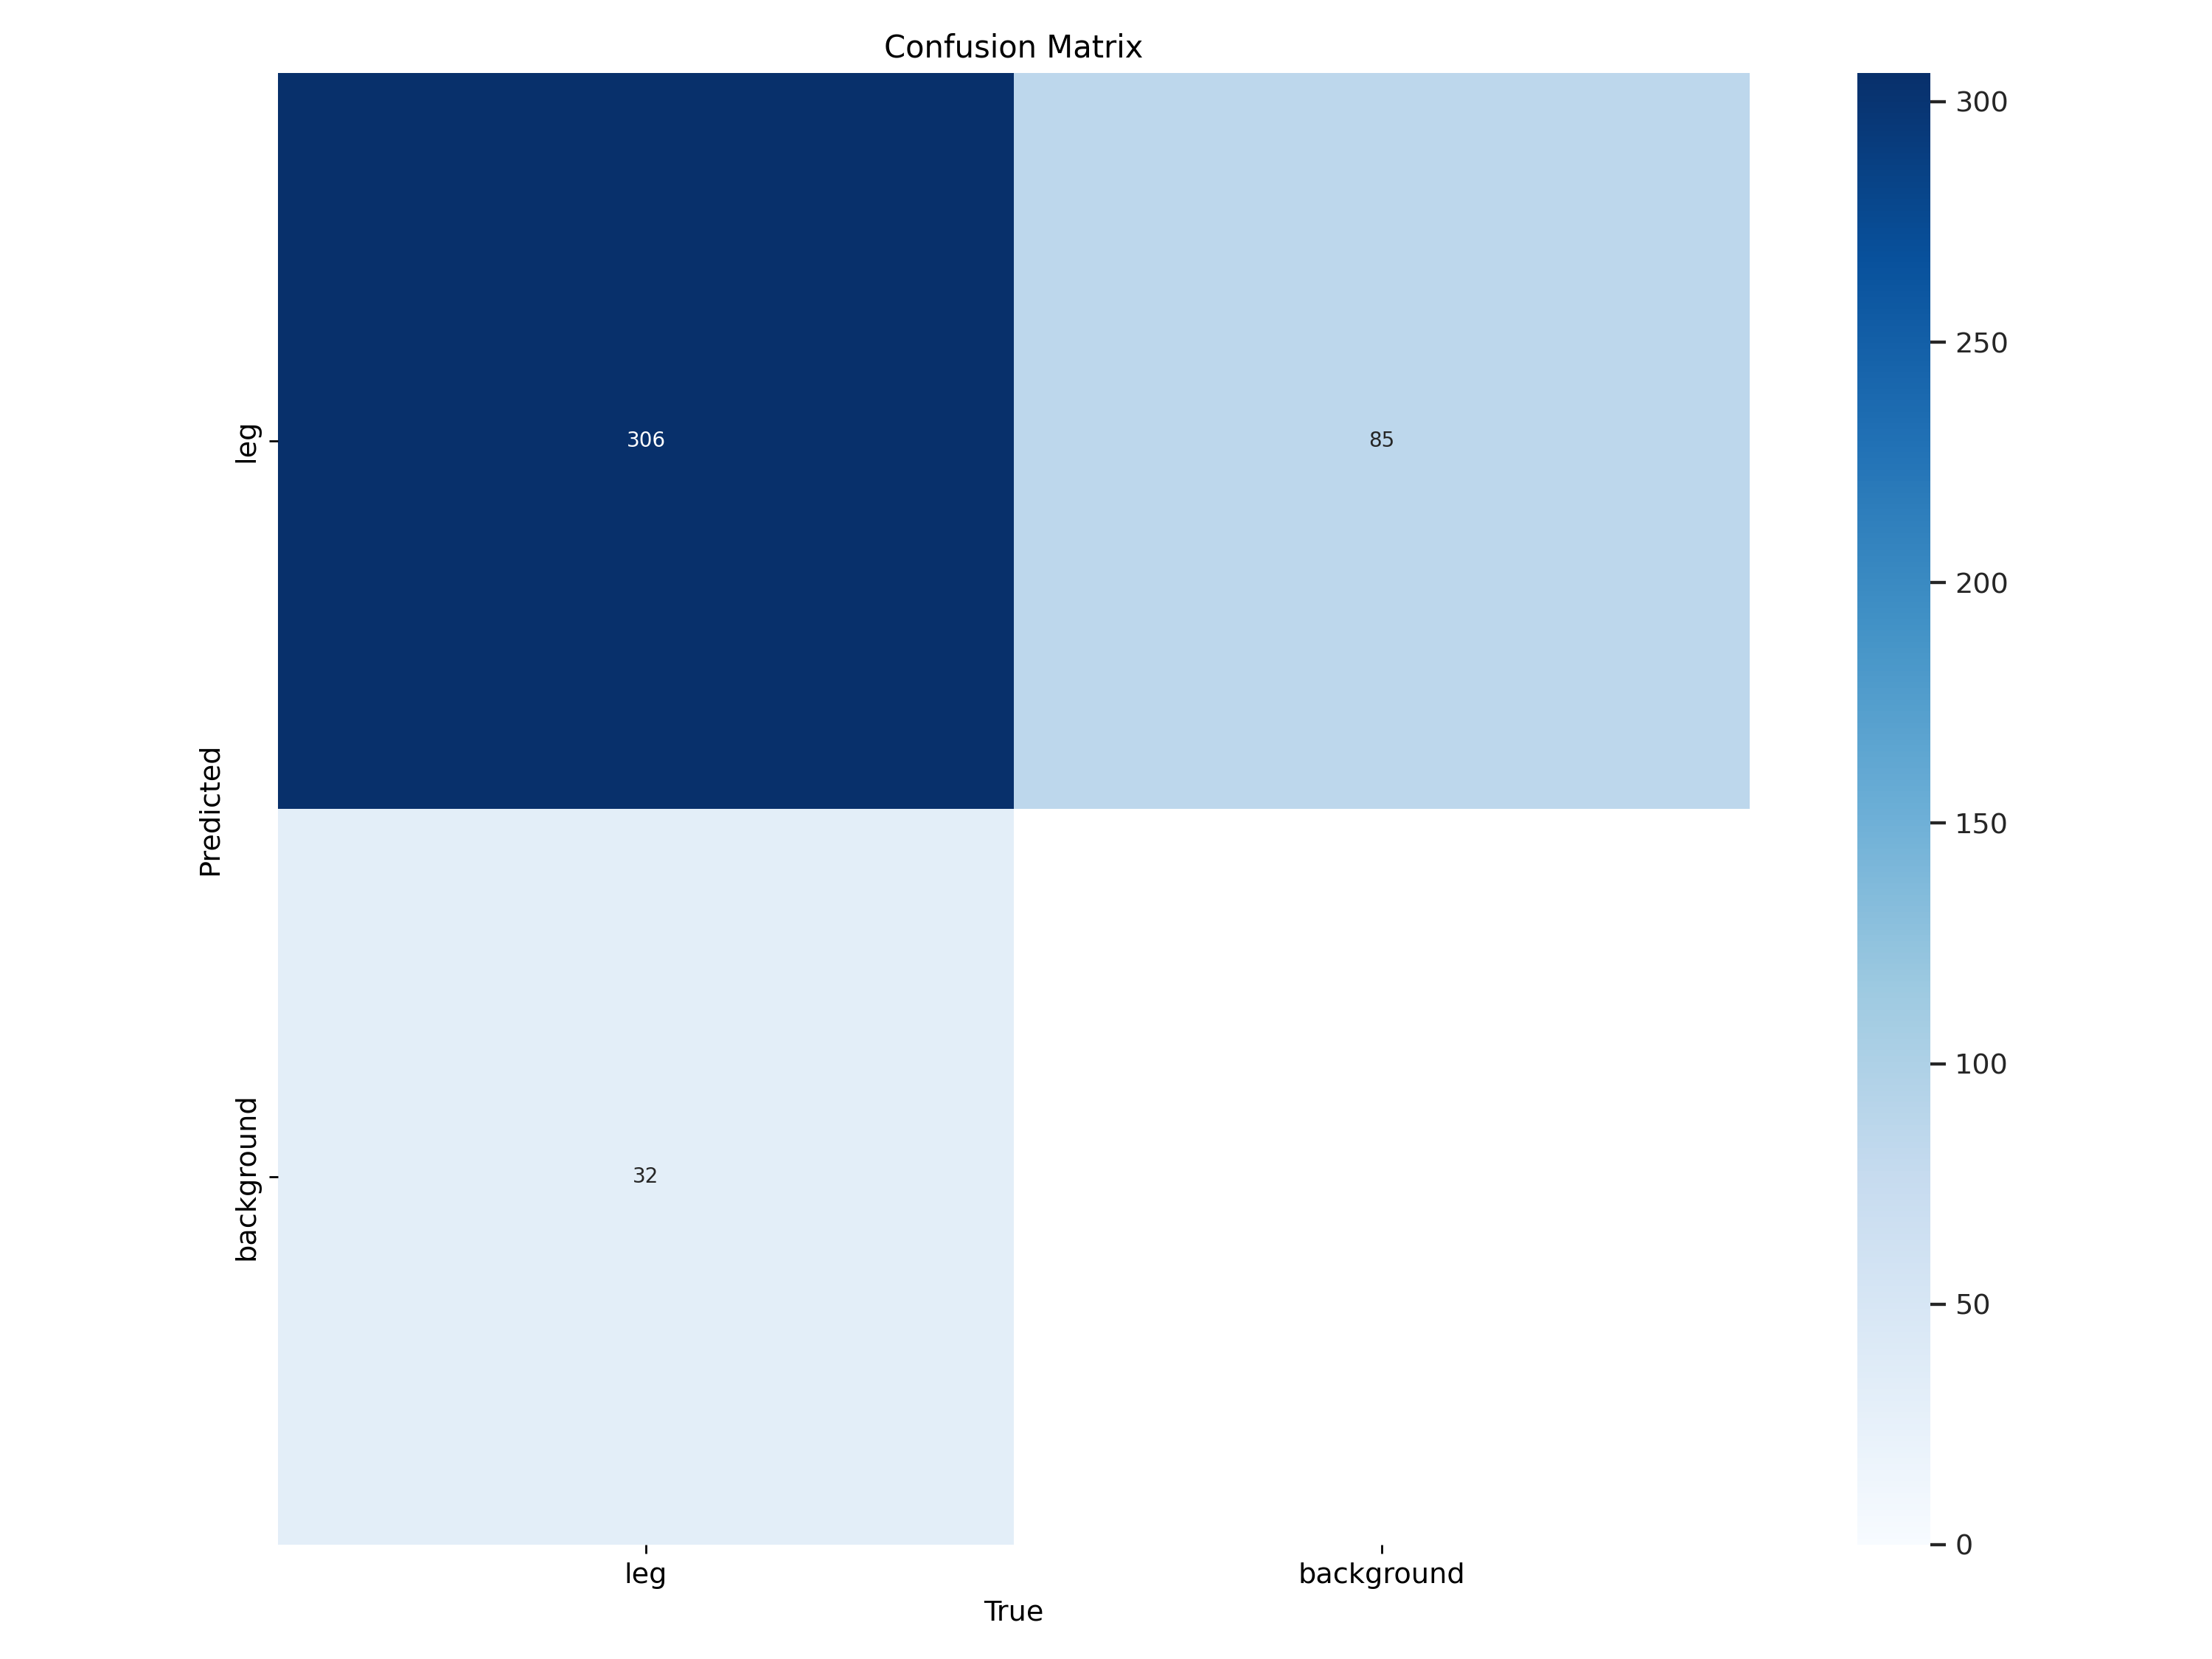

In [22]:
from IPython.display import Image

# confusion matrix
Image(filename=f"{resultPath}/confusion_matrix.png", width=900)

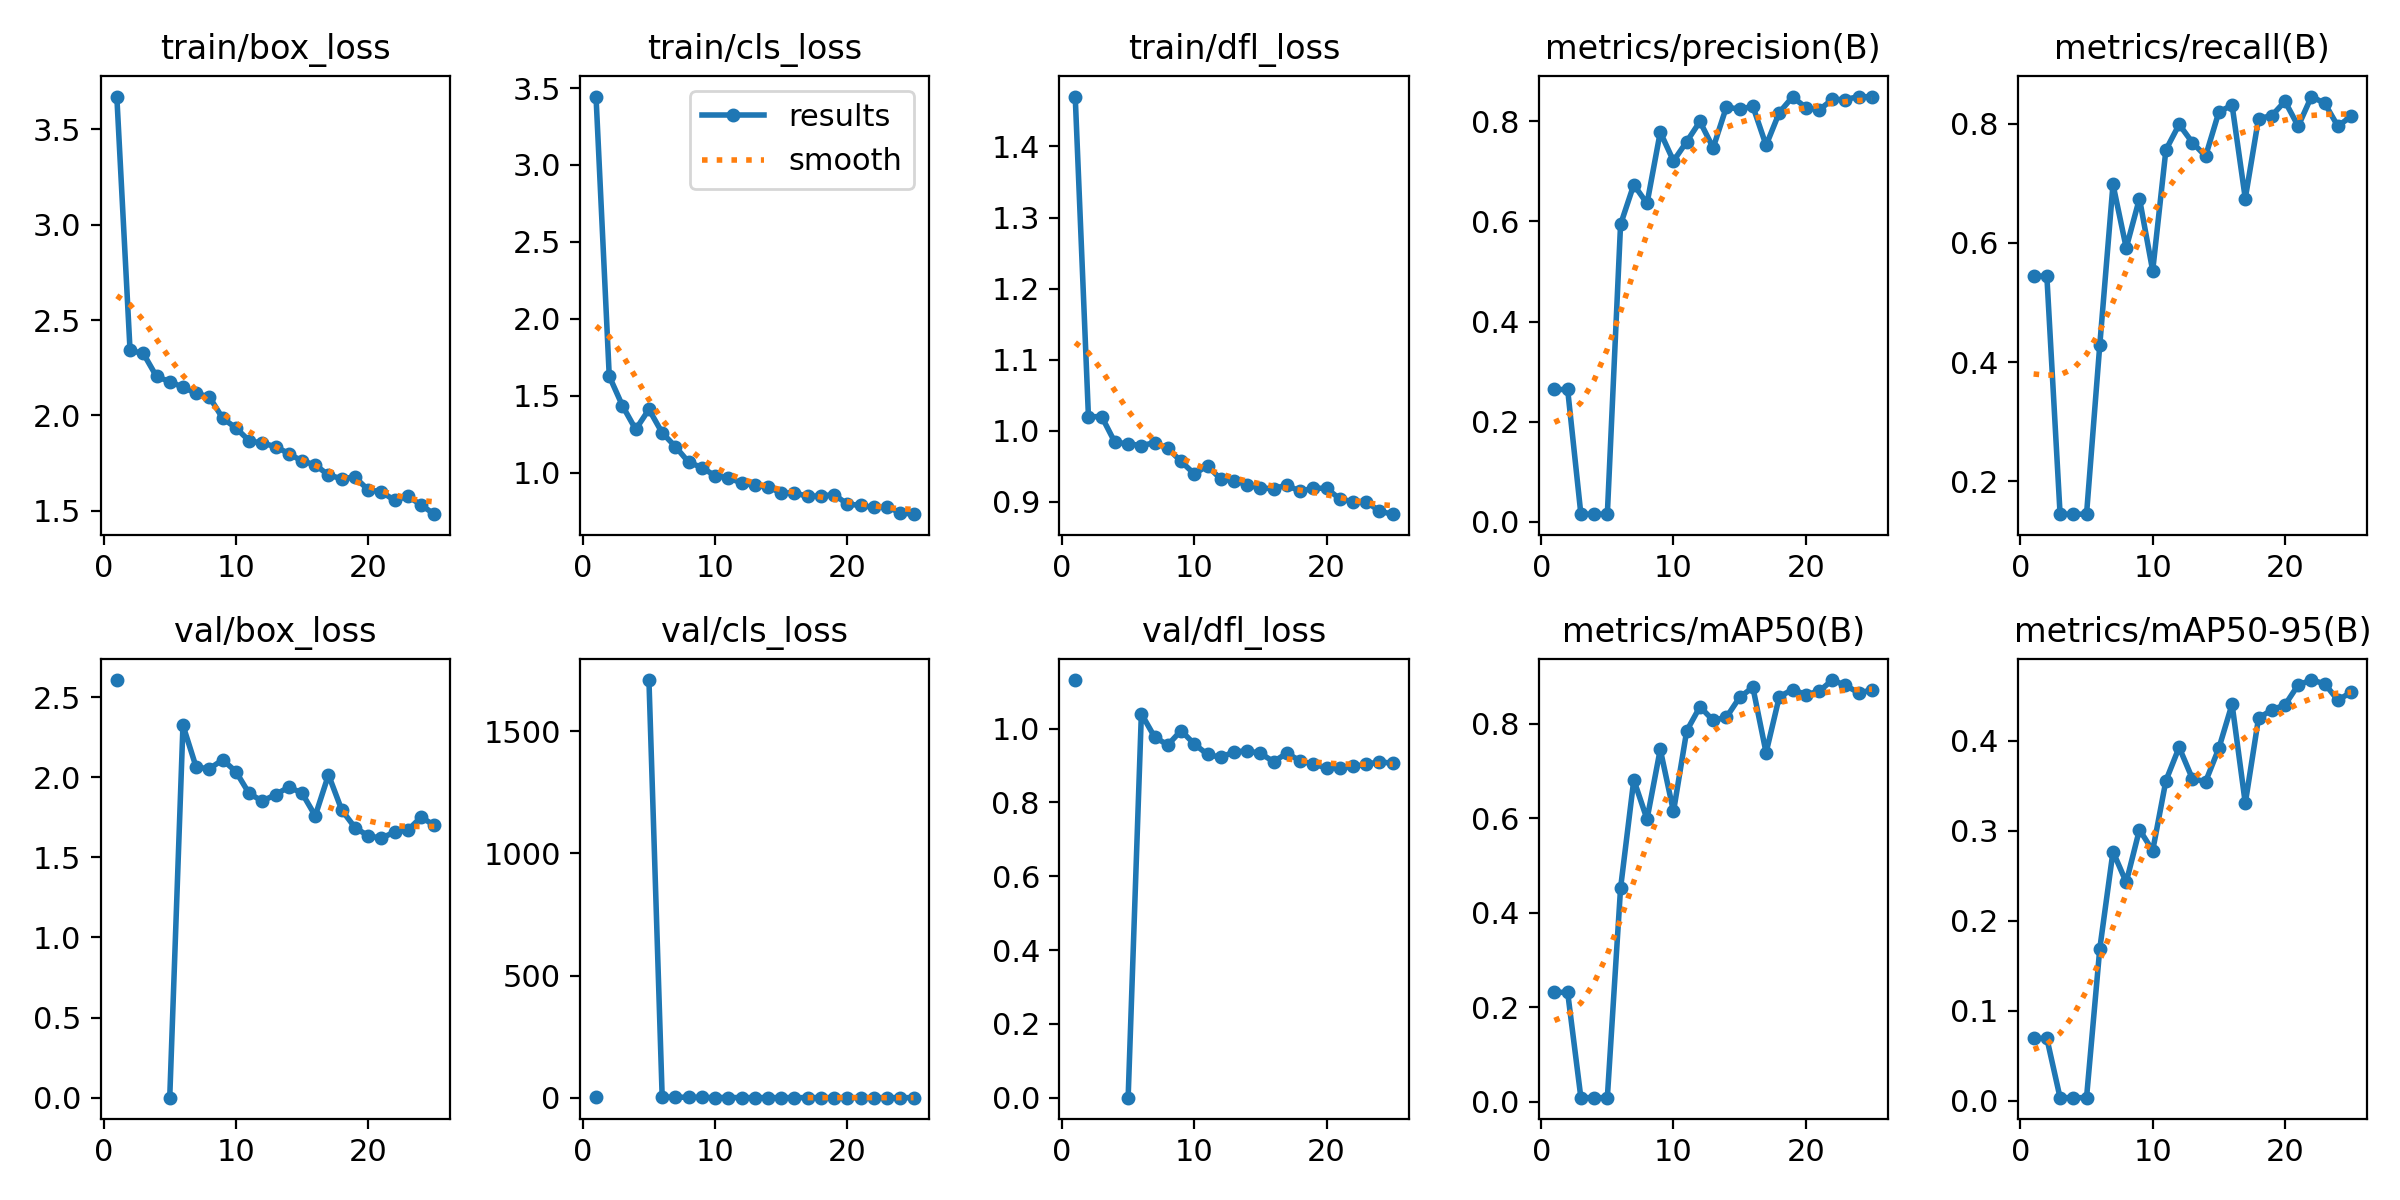

In [23]:
# box loss and class loss for train and validation dataset
Image(filename=f"{resultPath}/results.png", width=900)

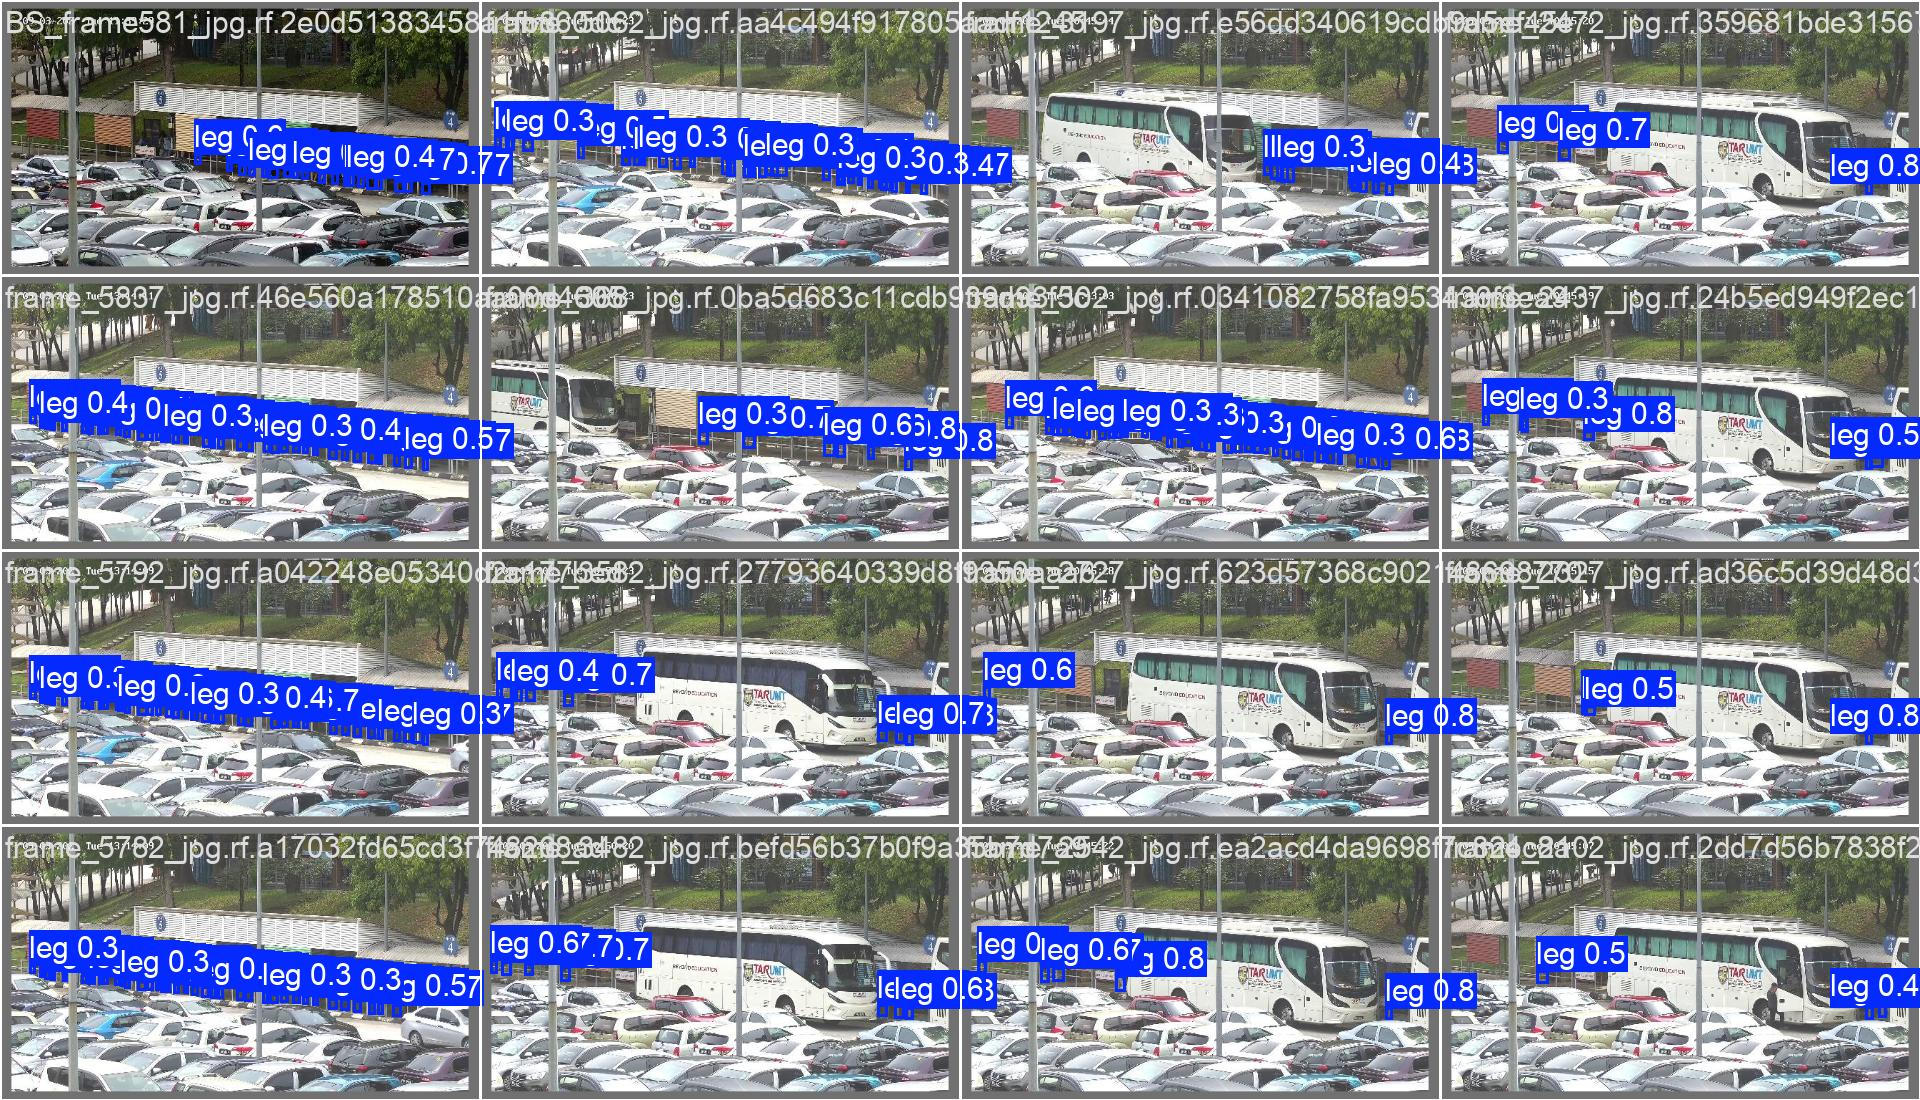

In [24]:
# show the test dataset image
Image(filename=f"{resultPath}/val_batch0_pred.jpg", width=900)


image 1/1 /content/Human-in-Bus-Stop-6/valid/images/frame_2012_jpg.rf.218055de23edbd09d44800415f9a8208.jpg: 384x640 2 legs, 31.4ms
Speed: 1.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

image 1/1 /content/Human-in-Bus-Stop-6/valid/images/frame_2012_jpg.rf.218055de23edbd09d44800415f9a8208.jpg: 384x640 2 legs, 30.8ms
Speed: 1.1ms preprocess, 30.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3


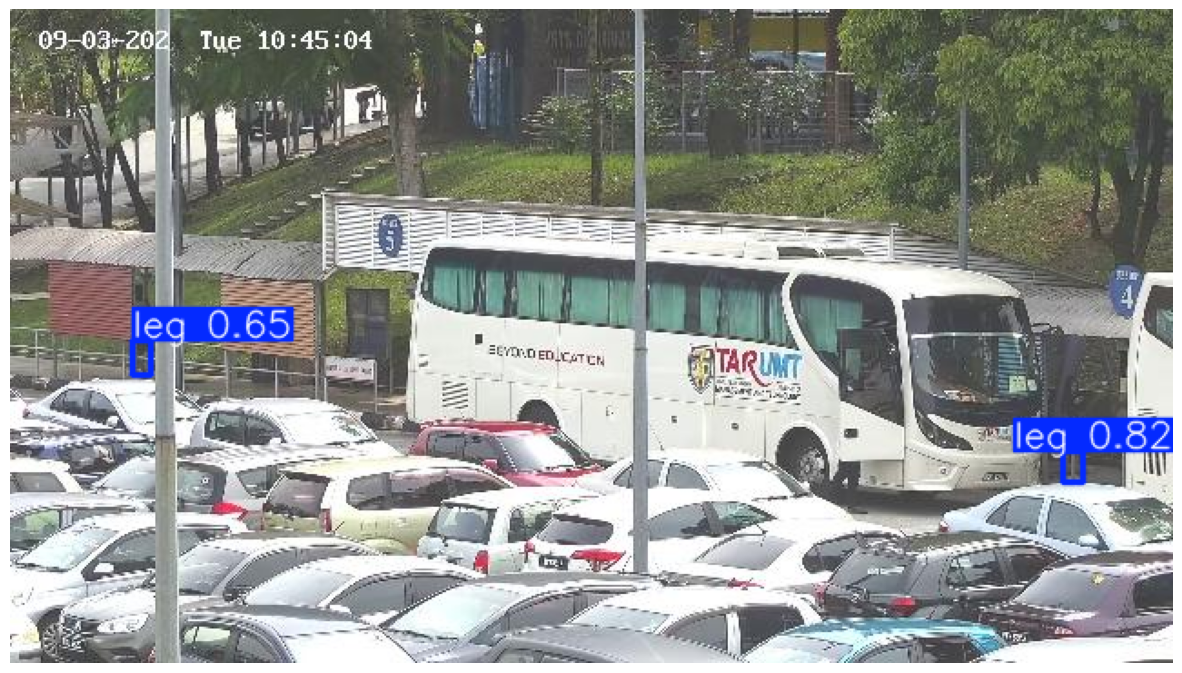

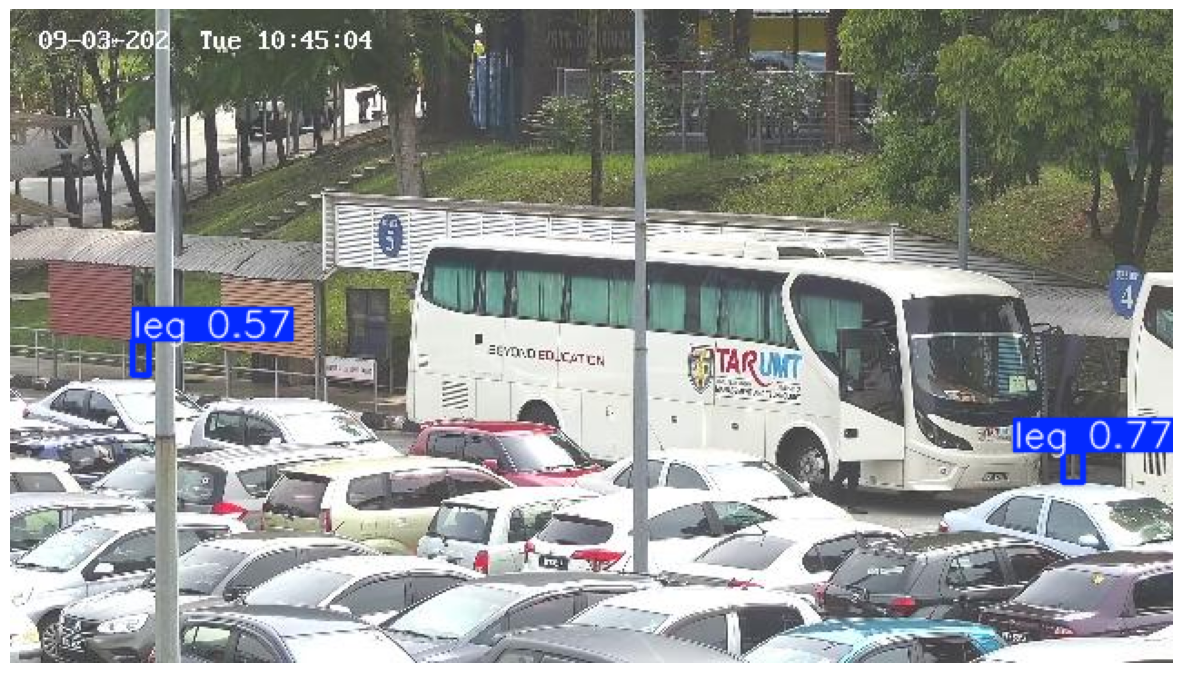

In [34]:
# try predict using best and last
imName = "frame_2012_jpg.rf.218055de23edbd09d44800415f9a8208.jpg"
imPath = f"{dataset.location}/valid/images/"

result1 = legDetectorBest.predict(f"{imPath}{imName}", save=True, imgsz=640, conf=0.25, classes=[0]) # 0.25
result2 = legDetectorLast.predict(f"{imPath}{imName}", save=True, imgsz=640, conf=0.20, classes=[0]) # 0.25

anonatationImageBest = result1[0].plot()
anonatationImageLast = result2[0].plot()

plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(anonatationImageBest, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(anonatationImageLast, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


image 1/1 /content/Human-in-Bus-Stop-6/valid/images/frame_5782_jpg.rf.a17032fd65cd3f748268ad85744f6689.jpg: 384x640 38 legs, 31.4ms
Speed: 1.5ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4

image 1/1 /content/Human-in-Bus-Stop-6/valid/images/frame_5782_jpg.rf.a17032fd65cd3f748268ad85744f6689.jpg: 384x640 39 legs, 30.9ms
Speed: 1.4ms preprocess, 30.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5


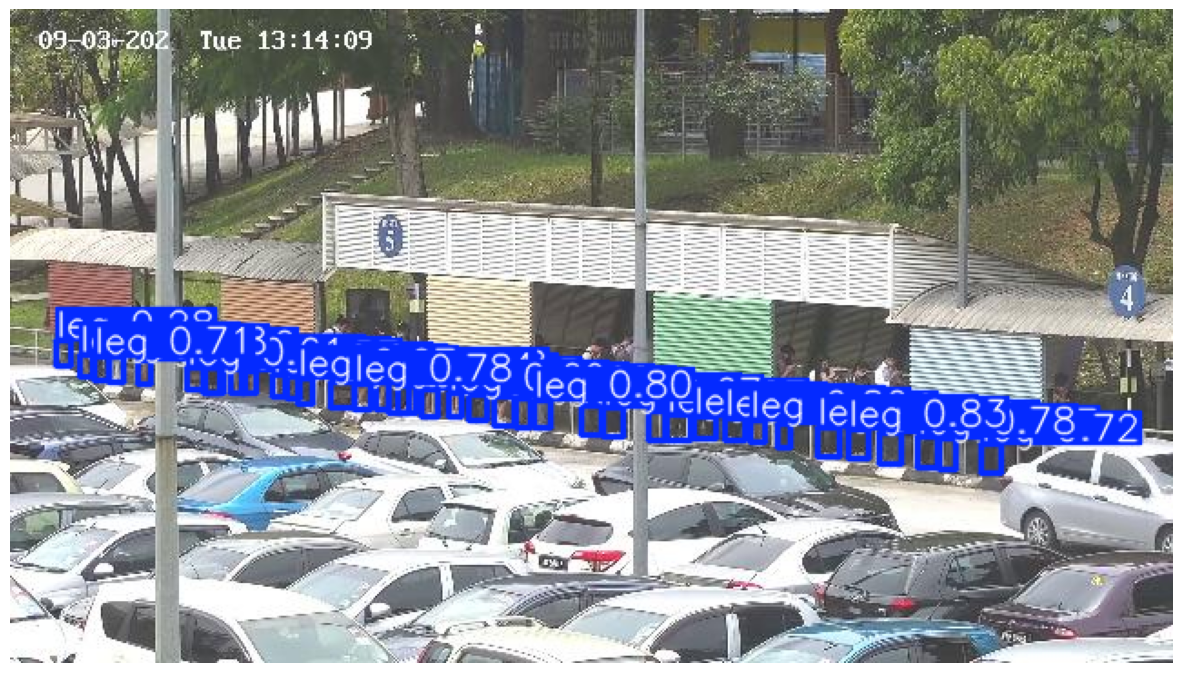

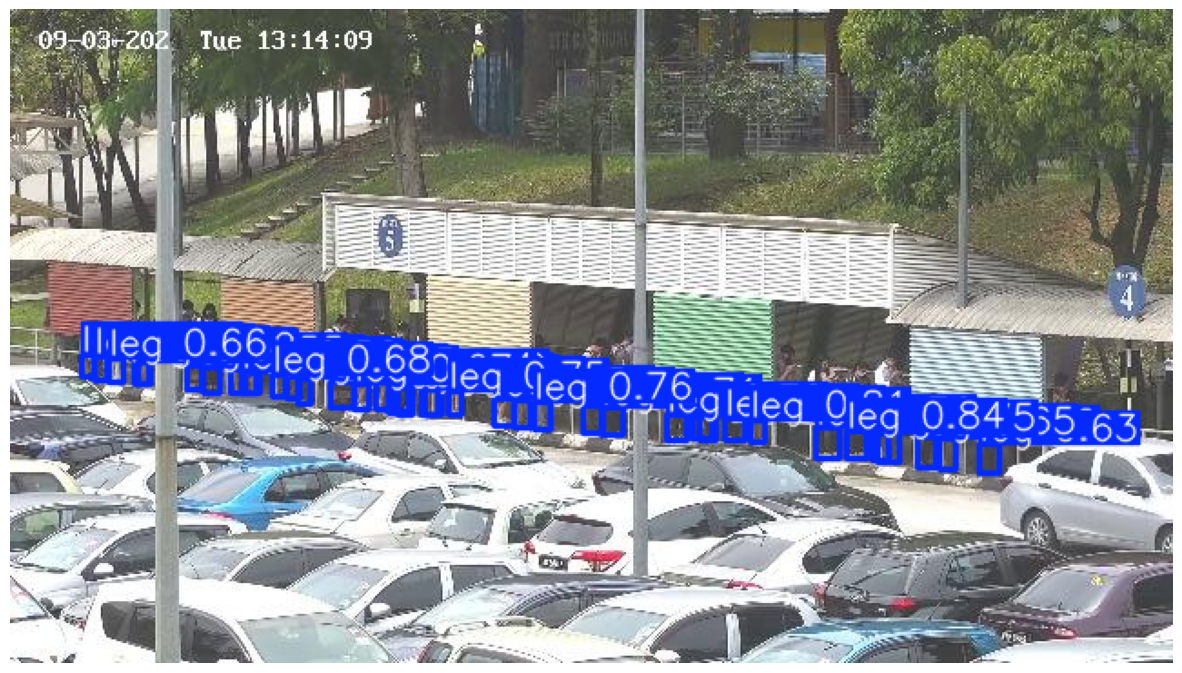

In [16]:
import numpy as np
import cv2

# try predict using best and last
imName = "frame_5782_jpg.rf.a17032fd65cd3f748268ad85744f6689.jpg"
imPath = f"{dataset.location}/valid/images/"

result1 = legDetectorBest.predict(f"{imPath}{imName}", save=True, imgsz=640, conf=0.25, classes=[0]) # 0.25
result2 = legDetectorLast.predict(f"{imPath}{imName}", save=True, imgsz=640, conf=0.20, classes=[0]) # 0.25

anonatationImageBest = result1[0].plot()
anonatationImageLast = result2[0].plot()

plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(anonatationImageBest, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(anonatationImageLast, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Save Result to GitHub

In [29]:
# copy the result for backup use
%cp -r /content/runs /content/drive/MyDrive/runs
# %cp -r /content/drive/MyDrive/runs /content/runs

In [30]:
# upload to github

# copy the runs to github
!cp -r /content/runs /content/Crowd-Detection/FineTune/result

# change to repository
%cd /content/Crowd-Detection

# push the dataset to github
!git config --global user.name "crabbbb"

!git config --global user.email "xuezhanixi666@gmail.com"

# stage and commit the change
!git add .
!git commit -m "upload result return for train yolo11l.pt"

# push
!git push https://{keys["GitHub"]}@github.com/crabbbb/Crowd-Detection.git

# change back to home
%cd /content/

/content/Crowd-Detection
[main 09cbcdf] upload result return for train yolo11l.pt
 25 files changed, 133 insertions(+)
 create mode 100644 FineTune/result/detect/predict/BS_frame104_jpg.rf.2e32bd75bf555d4044e089fb2e521984.jpg
 create mode 100644 FineTune/result/detect/predict2/frame_1587_jpg.rf.4fd356f8ffe78984ea3376333802e6dc.jpg
 create mode 100644 FineTune/result/detect/predict2/frame_2012_jpg.rf.218055de23edbd09d44800415f9a8208.jpg
 create mode 100644 FineTune/result/detect/train/F1_curve.png
 create mode 100644 FineTune/result/detect/train/PR_curve.png
 create mode 100644 FineTune/result/detect/train/P_curve.png
 create mode 100644 FineTune/result/detect/train/R_curve.png
 create mode 100644 FineTune/result/detect/train/args.yaml
 create mode 100644 FineTune/result/detect/train/confusion_matrix.png
 create mode 100644 FineTune/result/detect/train/confusion_matrix_normalized.png
 create mode 100644 FineTune/result/detect/train/events.out.tfevents.1732432445.04290903b1e9.2978.0
 cre